In [1]:
%pylab inline
from simulation import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os


Populating the interactive namespace from numpy and matplotlib


In [2]:
gamelogs = [file for file in os.listdir("./gamelogs") if file.endswith("txt")]

#gamelogs = ["nbafinals/game1"]
#gamelogs = ["nbafinals/game1","nbafinals/game2","nbafinals/game3","nbafinals/game4","nbafinals/game5"]
#gamelogs += ["nbafinals/cavspacers1","nbafinals/cavspacers2","nbafinals/cavspacers3","nbafinals/cavspacers4"]
#gamelogs += ["nbafinals/cavsraptors1","nbafinals/cavsraptors2","nbafinals/cavsraptors3","nbafinals/cavsraptors4"]
#gamelogs += ["nbafinals/cavsceltics1","nbafinals/cavsceltics2","nbafinals/cavsceltics3","nbafinals/cavsceltics4","nbafinals/cavsceltics5"]

In [3]:
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]
Lebron_3  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tLeBron' in line and "three" in line]) for game in gamelogs]
Lebron_jumper  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tLeBron' in line and "jumper" in line]) for game in gamelogs]

Kyrie_FT = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKyrie Irving' in line and "free throw" in line]) for game in gamelogs]
Kyrie_3  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKyrie Irving' in line and "three" in line]) for game in gamelogs]
Kyrie_jumper = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKyrie Irving' in line and "jumper" in line]) for game in gamelogs]

JR_3 = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tJR' in line and "three" in line]) for game in gamelogs]
#Klay_3 = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKlay' in line and "three" in line]) for game in gamelogs]

In [4]:
bron_models_3 = evaluate_models([l for l in Lebron_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])
bron_models_FT = evaluate_models([l for l in Lebron_FT if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])
bron_models_jumper = evaluate_models([l for l in Lebron_jumper if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])

kyrie_models_3 = evaluate_models([l for l in Kyrie_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])
kyrie_models_FT = evaluate_models([l for l in Kyrie_FT if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])
kyrie_models_jumper = evaluate_models([l for l in Kyrie_jumper if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])

JR_models_3 = evaluate_models([l for l in JR_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,4])


In [5]:
bron_models_FT

{'AIC': {0: 873.20249676244839,
  1: 877.40329241488053,
  2: 888.77100102435656,
  3: 907.23450280113082,
  4: 960.22692475224744},
 'DIC1': {0: 871.19761104505756,
  1: 871.34013134999918,
  2: 874.40285217013309,
  3: 875.22501158659986,
  4: 890.46348552870063},
 'DIC2': {0: 871.19528434756785,
  1: 871.31266077053965,
  2: 874.32453882279867,
  3: 875.28008827235124,
  4: 896.39583727285526},
 'LOO': {0: 871.13173404602094,
  1: 871.58570743784128,
  2: 874.53156217105789,
  3: 876.1167330151859,
  4: 894.4223706333579},
 'LPD': {0: 868.5097816351863,
  1: 863.3295328455788,
  2: 855.95421909502397,
  3: 837.07790893951676,
  4: 818.21450513268428},
 'LPPD': {0: 869.29379896084993,
  1: 865.27090823189928,
  2: 861.09133888923816,
  3: 848.42324743226891,
  4: 843.2434885492147},
 'LPPDCV2': {0: 870.24084815305832,
  1: 880.21199811725376,
  2: 878.48686326987752,
  3: 884.91489861620232,
  4: 920.66111486566831},
 'WAIC1': {0: 871.10715908712382,
  1: 871.4842111278017,
  2: 874.

In [6]:
bron_0 = infer_model(Lebron_3,["+","-"],0,0)
bron_1 = infer_model(Lebron_3,["+","-"],1,1)
bron_2 = infer_model(Lebron_3,["+","-"],1,2)
bron_3 = infer_model(Lebron_3,["+","-"],1,3)
bron_4 = infer_model(Lebron_3,["+","-"],1,4)

([<matplotlib.axis.XTick at 0x111bca828>,
 <a list of 5 Text xticklabel objects>)

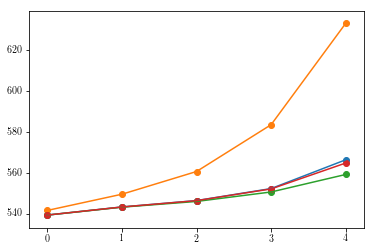

In [7]:


plt.plot([v for v in bron_models_3['LOO'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_3['LOO'].values()])
plt.plot([v for v in bron_models_3['AIC'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_3['AIC'].values()])
plt.plot([v for v in bron_models_3['WAIC1'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_3['WAIC1'].values()])
plt.plot([v for v in bron_models_3['WAIC2'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_3['WAIC2'].values()])


plt.xticks([0,1,2,3,4])


([<matplotlib.axis.XTick at 0x111d3f198>,
 <a list of 5 Text xticklabel objects>)

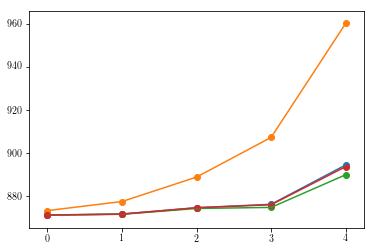

In [8]:


plt.plot([v for v in bron_models_FT['LOO'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_FT['LOO'].values()])
plt.plot([v for v in bron_models_FT['AIC'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_FT['AIC'].values()])
plt.plot([v for v in bron_models_FT['WAIC1'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_FT['WAIC1'].values()])
plt.plot([v for v in bron_models_FT['WAIC2'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_FT['WAIC2'].values()])


plt.xticks([0,1,2,3,4])


In [9]:
bron_models_FT

{'AIC': {0: 873.20249676244839,
  1: 877.40329241488053,
  2: 888.77100102435656,
  3: 907.23450280113082,
  4: 960.22692475224744},
 'DIC1': {0: 871.19761104505756,
  1: 871.34013134999918,
  2: 874.40285217013309,
  3: 875.22501158659986,
  4: 890.46348552870063},
 'DIC2': {0: 871.19528434756785,
  1: 871.31266077053965,
  2: 874.32453882279867,
  3: 875.28008827235124,
  4: 896.39583727285526},
 'LOO': {0: 871.13173404602094,
  1: 871.58570743784128,
  2: 874.53156217105789,
  3: 876.1167330151859,
  4: 894.4223706333579},
 'LPD': {0: 868.5097816351863,
  1: 863.3295328455788,
  2: 855.95421909502397,
  3: 837.07790893951676,
  4: 818.21450513268428},
 'LPPD': {0: 869.29379896084993,
  1: 865.27090823189928,
  2: 861.09133888923816,
  3: 848.42324743226891,
  4: 843.2434885492147},
 'LPPDCV2': {0: 870.24084815305832,
  1: 880.21199811725376,
  2: 878.48686326987752,
  3: 884.91489861620232,
  4: 920.66111486566831},
 'WAIC1': {0: 871.10715908712382,
  1: 871.4842111278017,
  2: 874.

In [10]:
bron_models_3

{'AIC': {0: 541.5914734537746,
  1: 549.50645860498867,
  2: 560.59405220362578,
  3: 583.45426792066564,
  4: 632.94588780435697},
 'DIC1': {0: 539.58367147886588,
  1: 543.43065225487999,
  2: 546.17147097149211,
  3: 551.13139128123271,
  4: 559.61654882873017},
 'DIC2': {0: 539.57811355757508,
  1: 543.37688218779454,
  2: 545.91908324554868,
  3: 550.19071380415653,
  4: 559.7993332168935},
 'LOO': {0: 539.32921096332757,
  1: 543.27932999176983,
  2: 546.39122585613939,
  3: 552.26154691024362,
  4: 566.31561427584825},
 'LPD': {0: 536.89899982846146,
  1: 535.43362826049542,
  2: 527.78019458997858,
  3: 513.29282896704967,
  4: 490.15766251207469},
 'LPPD': {0: 537.86582749820263,
  1: 537.75860747442687,
  2: 532.84318666048034,
  3: 524.39879283530468,
  4: 513.77714772407671},
 'LPPDCV2': {0: 539.72063956781858,
  1: 542.80641882999078,
  2: 552.18225956115975,
  3: 569.46451694309906,
  4: 586.12147011171851},
 'WAIC1': {0: 539.31005752806186,
  1: 543.18557726420215,
  2: 